Welcome to the App Review Analysis Tool
Using default file path: C:\Users\theoldregime\Documents\projects\toshow\app_reviews.csv
Would you like to use a custom file path? (y/n): n

Available apps in the dataset:
['BBC News' 'The New York Times' 'Telegram' 'Slack' 'Flipboard' 'Duolingo'
 'Hulu' 'Netflix' 'Instagram' 'Candy Crush Saga' 'Skype' 'Among Us'
 'Khan Academy' 'MyFitnessPal' 'Strava' 'Coursera' 'Pinterest' 'Fortnite'
 'Facebook' 'Spotify' 'YouTube' 'Twitter' 'CNN' 'Quizlet' 'WhatsApp'
 'Trello' 'Facebook Messenger' 'PUBG Mobile' 'Microsoft Word'
 'Google News' 'Google Docs' 'Disney+' 'Evernote' 'Fitbit' 'Signal'
 'Headspace' 'Snapchat' 'Calm' 'Clash of Clans']

Enter the name of the app you want to analyze: Telegram

Analyzing data for 'Telegram'...


C:\Users\theoldregime\AppData\Local\Temp\ipykernel_25108\323306049.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


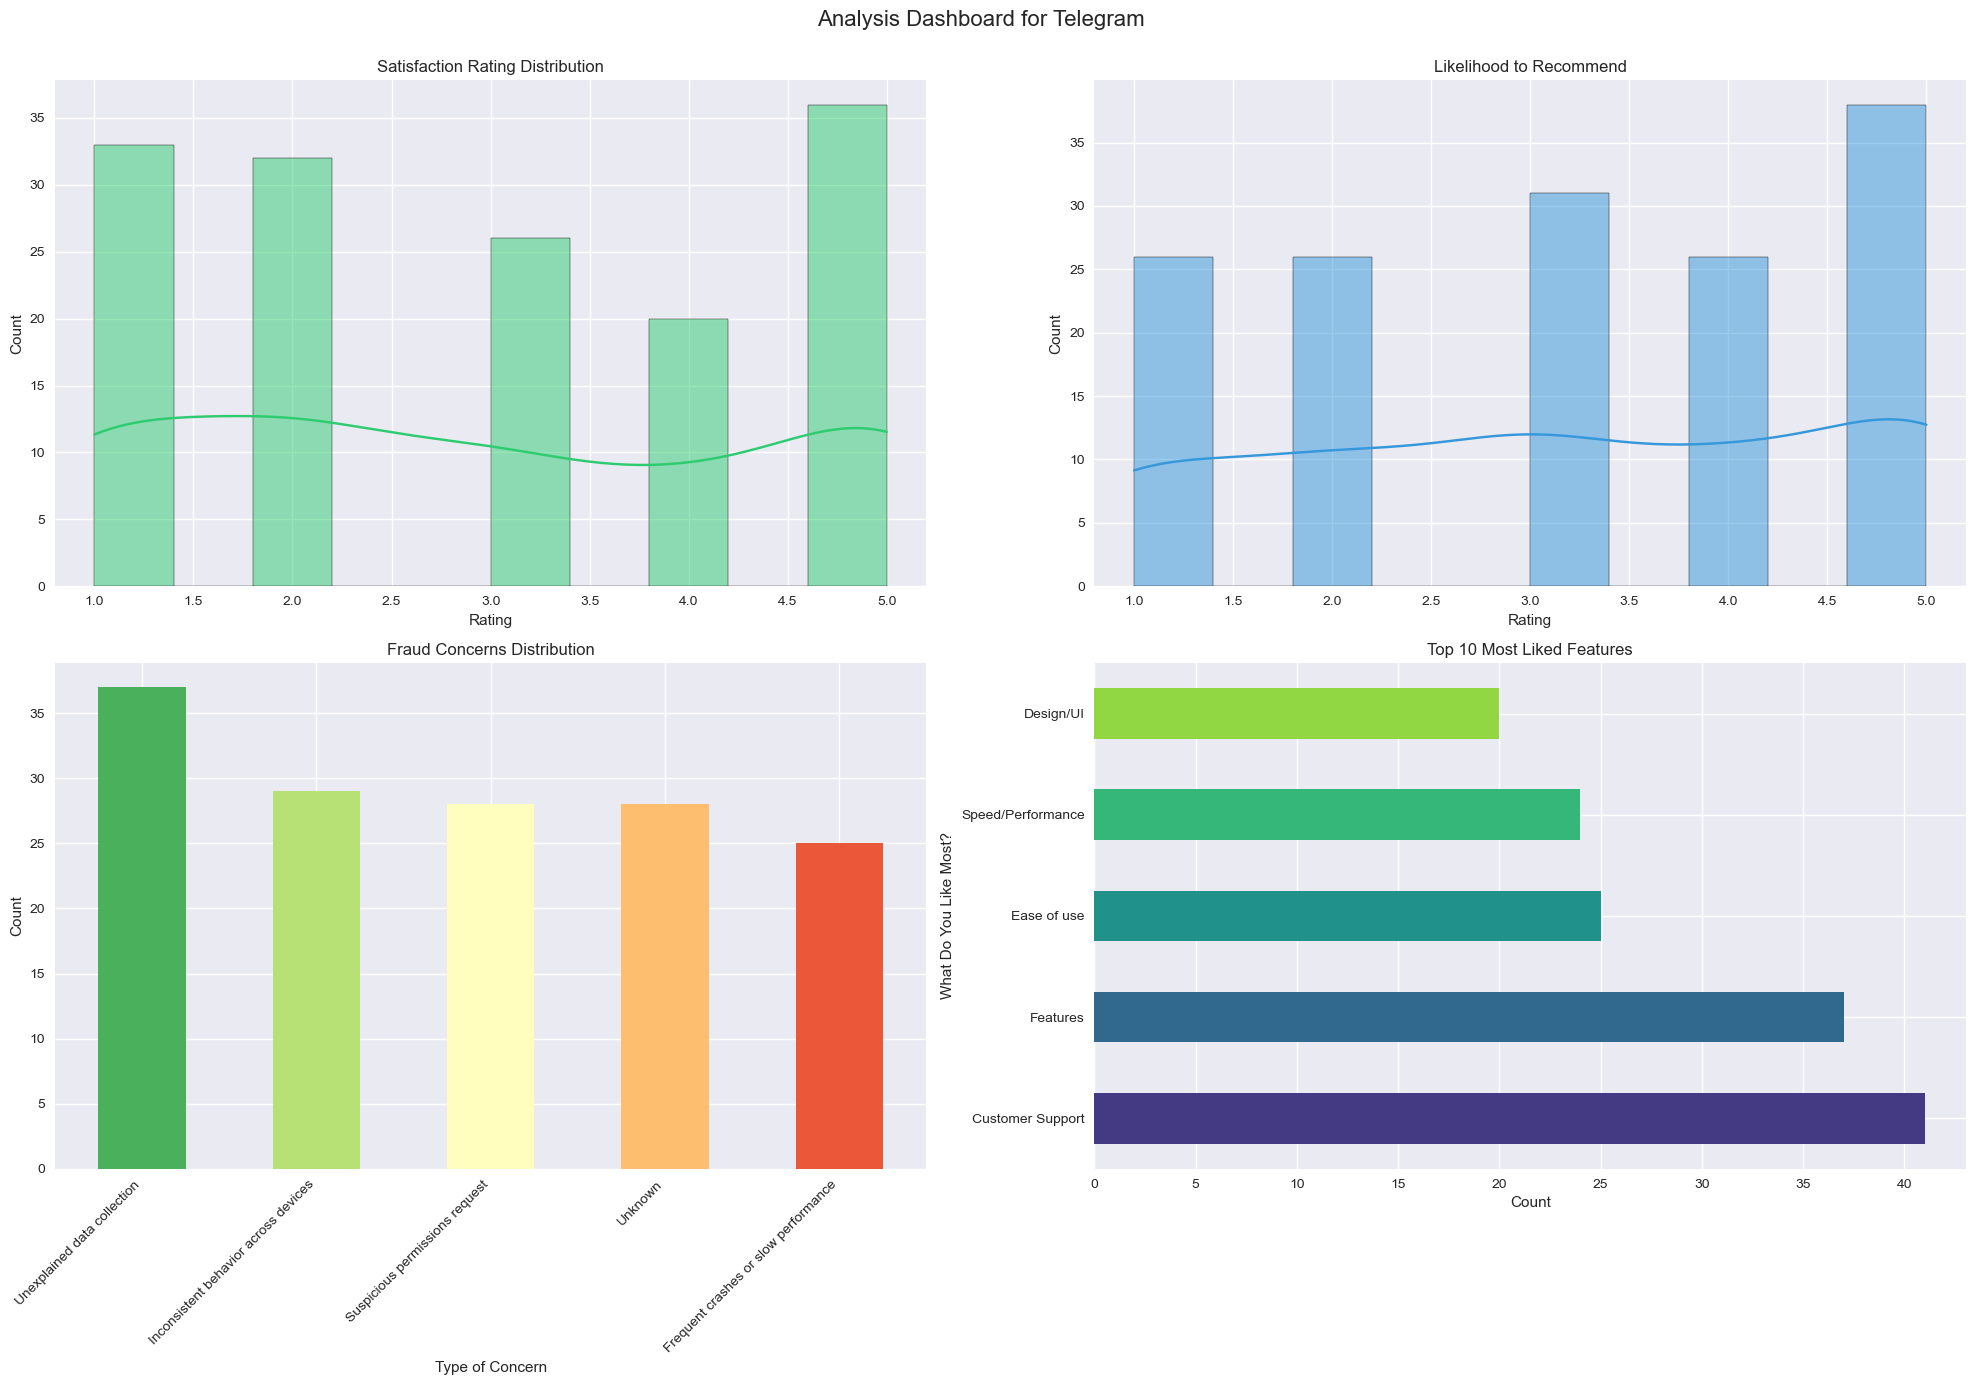


Model Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       407
           1       0.49      0.57      0.53       396

    accuracy                           0.50       803
   macro avg       0.50      0.50      0.49       803
weighted avg       0.50      0.50      0.49       803

[[173 234]
 [171 225]]

Fraud Detection Model Prediction:
Probability of fraudulent activity: 59.86%

=== Detailed App Analysis Report ===

General Information:
       Satisfaction Rating  Likelihood to Recommend
count           147.000000               147.000000
mean              2.959184                 3.163265
std               1.498298                 1.443174
min               1.000000                 1.000000
25%               2.000000                 2.000000
50%               3.000000                 3.000000
75%               4.000000                 5.000000
max               5.000000                 5.000000

Satisfaction Rating Dist

C:\Users\theoldregime\AppData\Local\Temp\ipykernel_25108\323306049.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['Fraud Concerns'] = fraud_data['Fraud Concerns'].apply(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Default file path
DEFAULT_FILE_PATH = r"C:\Users\theoldregime\Documents\projects\toshow\app_reviews.csv"

def load_and_preprocess_data(file_path=None):
    """Load and preprocess the dataset."""
    if file_path is None:
        file_path = DEFAULT_FILE_PATH
    
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found at {file_path}")
            
        data = pd.read_csv(file_path)
        
        # Enhanced data preprocessing
        data['Fraud Concerns'] = data['Fraud Concerns'].fillna('Unknown')
        data['Satisfaction Rating'] = pd.to_numeric(data['Satisfaction Rating'], errors='coerce')
        data['Likelihood to Recommend'] = pd.to_numeric(data['Likelihood to Recommend'], errors='coerce')
        
        # Clean text columns
        text_columns = ['What Do You Like Most?', 'Comments/Suggestions']
        for col in text_columns:
            if col in data.columns:
                data[col] = data[col].fillna('Not Specified')
                data[col] = data[col].astype(str).str.strip()
        
        return data
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

def create_visualizations(app_data, app_name):
    """Create improved visualizations with better layout and styling."""
    if app_data.empty:
        print("No data to visualize")
        return
        
    try:
        # Set the style
        plt.style.use('seaborn')
        
        # Create a figure with subplots
        fig = plt.figure(figsize=(20, 15))
        fig.suptitle(f'Analysis Dashboard for {app_name}', fontsize=16, y=0.95)
        
        # 1. Satisfaction Rating Distribution
        ax1 = plt.subplot(2, 2, 1)
        sns.histplot(data=app_data, x='Satisfaction Rating', bins=10, kde=True, color='#2ecc71', ax=ax1)
        ax1.set_title('Satisfaction Rating Distribution')
        ax1.set_xlabel('Rating')
        ax1.set_ylabel('Count')
        
        # 2. Likelihood to Recommend
        ax2 = plt.subplot(2, 2, 2)
        sns.histplot(data=app_data, x='Likelihood to Recommend', bins=10, kde=True, color='#3498db', ax=ax2)
        ax2.set_title('Likelihood to Recommend')
        ax2.set_xlabel('Rating')
        ax2.set_ylabel('Count')
        
        # 3. Fraud Concerns Analysis
        ax3 = plt.subplot(2, 2, 3)
        fraud_counts = app_data['Fraud Concerns'].value_counts()
        colors = sns.color_palette('RdYlGn_r', n_colors=len(fraud_counts))
        fraud_counts.plot(kind='bar', ax=ax3, color=colors)
        ax3.set_title('Fraud Concerns Distribution')
        ax3.set_xlabel('Type of Concern')
        ax3.set_ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        
        # 4. Features users like most
        ax4 = plt.subplot(2, 2, 4)
        like_most_counts = app_data['What Do You Like Most?'].value_counts().head(10)
        colors = sns.color_palette('viridis', n_colors=len(like_most_counts))
        like_most_counts.plot(kind='barh', ax=ax4, color=colors)
        ax4.set_title('Top 10 Most Liked Features')
        ax4.set_xlabel('Count')
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    except Exception as e:
        print(f"Error creating visualizations: {str(e)}")

def train_fraud_model(data):
    """Train a RandomForestClassifier to predict fraud concerns."""
    try:
        # Drop rows where fraud concern is 'Unknown' to ensure valid training data
        fraud_data = data[data['Fraud Concerns'] != 'Unknown']
        
        # Features for model training (you can expand this as needed)
        feature_columns = ['Satisfaction Rating', 'Likelihood to Recommend']
        
        # Encode the 'Fraud Concerns' column into binary values (1 for fraud, 0 for non-fraud)
        #fraud_data['Fraud Concerns'] = fraud_data['Fraud Concerns'].apply(lambda x: 1 if x != 'Not Specified' else 0)
        
        fraud_data['Fraud Concerns'] = fraud_data['Fraud Concerns'].apply(
    lambda x: 1 if x in ['Suspicious permissions request', 'Unexplained data collection'] else 0
)

        # Prepare the features and labels
        X = fraud_data[feature_columns].dropna()
        y = fraud_data['Fraud Concerns'].dropna()
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize the RandomForestClassifier and train the model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = model.predict(X_test)
        print("\nModel Evaluation:")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        
        return model, feature_columns
    except Exception as e:
        print(f"Error training fraud model: {str(e)}")
        return None, None

def predict_fraud(model, app_data, feature_columns):
    """Use the trained model to predict fraud concerns for the app data."""
    try:
        # Ensure that app_data has the required feature columns
        app_data = app_data[feature_columns].dropna()
        
        # Predict fraud concerns (1 for fraud, 0 for non-fraud)
        predictions = model.predict(app_data)
        
        return predictions
    except Exception as e:
        print(f"Error predicting fraud: {str(e)}")
        return None

def generate_detailed_report(app_data):
    """Generate a detailed report of the app data."""
    try:
        # Example sections for the report
        report = {}
        
        # General information
        report['General Information'] = app_data.describe()
        
        # Satisfaction rating distribution
        report['Satisfaction Rating Distribution'] = app_data['Satisfaction Rating'].describe()
        
        # Likelihood to recommend distribution
        report['Likelihood to Recommend Distribution'] = app_data['Likelihood to Recommend'].describe()
        
        # Fraud concerns summary
        report['Fraud Concerns Summary'] = app_data['Fraud Concerns'].value_counts()
        
        # Additional descriptive statistics for text fields
        report['Most Common Likes'] = app_data['What Do You Like Most?'].value_counts().head(10)
        report['Top Comments'] = app_data['Comments/Suggestions'].dropna().head(5)
        
        # Missing data summary
        report['Missing Data Summary'] = app_data.isnull().sum()
        
        return report
    except Exception as e:
        print(f"Error generating report: {str(e)}")
        return {}

def main():
    print("Welcome to the App Review Analysis Tool")
    print(f"Using default file path: {DEFAULT_FILE_PATH}")
    
    # Ask if user wants to use custom path
    use_custom = input("Would you like to use a custom file path? (y/n): ").lower().strip()
    
    if use_custom == 'y':
        file_path = input("Enter the path to your CSV file: ")
    else:
        file_path = None
    
    # Load data
    data = load_and_preprocess_data(file_path)
    if data is None:
        return
    
    # Display available apps
    print("\nAvailable apps in the dataset:")
    print(data['App Name'].unique())
    
    # Get app name
    while True:
        app_name = input("\nEnter the name of the app you want to analyze: ")
        app_data = data[data['App Name'].str.contains(app_name, case=False, na=False)]
        if not app_data.empty:
            break
        print(f"No data found for app: {app_name}. Please try again.")
    
    print(f"\nAnalyzing data for '{app_name}'...")
    
    # Create visualizations
    create_visualizations(app_data, app_name)
    
    # Train model and make predictions
    model, feature_columns = train_fraud_model(data)
    if model is not None:
        predictions = predict_fraud(model, app_data, feature_columns)
        if predictions is not None:
            fraud_probability = predictions.mean()
            print(f"\nFraud Detection Model Prediction:")
            print(f"Probability of fraudulent activity: {fraud_probability:.2%}")
    
    # Generate and display report
    report = generate_detailed_report(app_data)
    print("\n=== Detailed App Analysis Report ===")
    for section, content in report.items():
        print(f"\n{section}:")
        print(content)

if __name__ == "__main__":
    main()
